<a href="https://colab.research.google.com/github/lokeshveer/Advertising-Sales-Prediction/blob/main/linear_reggression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing data
import pandas as pd
df=pd.read_csv('/content/Advertising Budget and Sales.csv')
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
#checking for null values
df.isna().sum()

,0
Unnamed: 0,0
TV Ad Budget ($),0
Radio Ad Budget ($),0
Newspaper Ad Budget ($),0
Sales ($),0


In [5]:
#checking for duplicate values
df.duplicated().sum()

np.int64(0)

<Axes: ylabel='Sales ($)'>

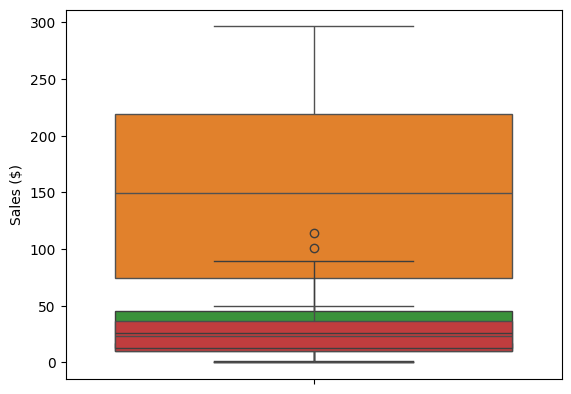

In [6]:
# checking for outliers using box plot
import seaborn as sns
sns.boxplot(df['Sales ($)'])
sns.boxplot(df['TV Ad Budget ($)'])
sns.boxplot(df['Newspaper Ad Budget ($)'])
sns.boxplot(df['Radio Ad Budget ($)'])

In [7]:
# Apply IQR to all numeric columns
for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Remove outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Dataset after removing outliers using IQR:\n", df)


Dataset after removing outliers using IQR:
      Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  \
0             1             230.1                 37.8   
1             2              44.5                 39.3   
2             3              17.2                 45.9   
3             4             151.5                 41.3   
4             5             180.8                 10.8   
..          ...               ...                  ...   
195         196              38.2                  3.7   
196         197              94.2                  4.9   
197         198             177.0                  9.3   
198         199             283.6                 42.0   
199         200             232.1                  8.6   

     Newspaper Ad Budget ($)  Sales ($)  
0                       69.2       22.1  
1                       45.1       10.4  
2                       69.3        9.3  
3                       58.5       18.5  
4                       58.4       12.9  
..     

In [8]:
# import the linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [9]:
# training the data and definie model

X = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]  # Features
Y = df['Sales ($)']  # Target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

#make predction on testing data
y_pred = model.predict(X_test)

#calculation accuary score and mse
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

accuracy = model.score(X_test, Y_test)
print("Accuracy:", accuracy)

#calculation r2_ score
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred)
print("R-squared:", r2)


# caluclation mae
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae)

#caluclation RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 2.7409119066899947
Accuracy: 0.8989454779619588
R-squared: 0.8989454779619588
Mean Absolute Error: 1.2497394075236383
Root Mean Squared Error: 1.6555699642993027


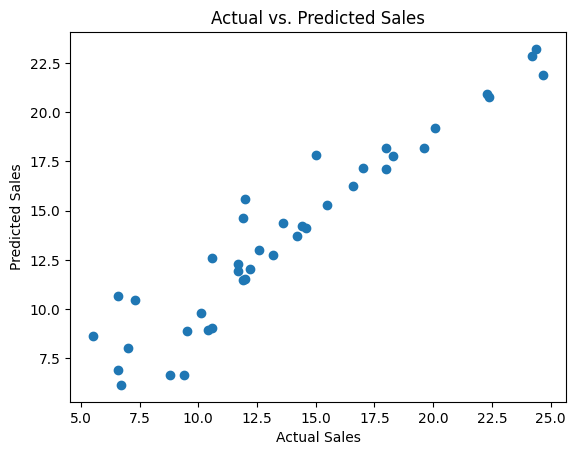

In [10]:
# visualize the predicted vs. actual values using scatter plots.
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

In [11]:
#predict
new_data = pd.DataFrame({'TV Ad Budget ($)': [100000], 'Radio Ad Budget ($)': [50000], 'Newspaper Ad Budget ($)': [20000]})
predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [13746.36097917]


In [12]:
#Feature Importance: Check which advertising channel (TV, Radio, or Newspaper) influences sales the most
feature_importance = pd.Series(model.coef_, index=['TV', 'Radio', 'Newspaper'])
feature_importance

,0
TV,0.045229
Radio,0.182393
Newspaper,0.005043


In [13]:
#importing ridge model
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
print("Mean Squared Error (Ridge Regression):", mse_ridge)
accuracy_ridge = ridge_model.score(X_test, Y_test)
print("Accuracy (Ridge Regression):", accuracy_ridge)
mae_ridge = mean_absolute_error(Y_test, y_pred_ridge)
print("Mean Absolute Error (Ridge Regression):", mae_ridge)


Mean Squared Error (Ridge Regression): 2.7409853970485214
Accuracy (Ridge Regression): 0.8989427684501948
Mean Absolute Error (Ridge Regression): 1.2497632399998369


In [14]:
#importing lasso model
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, Y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
print("Mean Squared Error (Lasso Regression):", mse_lasso)
accuracy_lasso = lasso_model.score(X_test, Y_test)
print("Accuracy (Lasso Regression):", accuracy_lasso)
mae_lasso = mean_absolute_error(Y_test, y_pred_lasso)
print("Mean Absolute Error (Lasso Regression):", mae_lasso)

Mean Squared Error (Lasso Regression): 2.751441398136632
Accuracy (Lasso Regression): 0.8985572667528183
Mean Absolute Error (Lasso Regression): 1.2525807623361103


In [15]:
#importing polynomial model
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(Y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)
accuracy_poly = poly_model.score(X_test_poly, Y_test)
print("Accuracy (Polynomial Regression):", accuracy_poly)
mae_poly = mean_absolute_error(Y_test, y_pred_poly)
print("Mean Absolute Error (Polynomial Regression):", mae_poly)

Mean Squared Error (Polynomial Regression): 0.3398580956666734
Accuracy (Polynomial Regression): 0.9874697915921604
Mean Absolute Error (Polynomial Regression): 0.4687380454284746


In [18]:
# comparing linear regression ridge and lasso models
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
y_pred_linear = linear_model.predict(X_test)

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Adjust alpha for more regularization
ridge_model.fit(X_train, Y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Train Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # Adjust alpha to see effect on feature selection
lasso_model.fit(X_train, Y_train)
y_pred_lasso = lasso_model.predict(X_test)



def evaluate_model(model_name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R2 Score": r2}

results = [
    evaluate_model("Linear Regression", Y_test, y_pred_linear),
    evaluate_model("Ridge Regression", Y_test, y_pred_ridge),
    evaluate_model("Lasso Regression", Y_test, y_pred_lasso),
]

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

               Model       MAE      RMSE  R2 Score
0  Linear Regression  1.249739  1.655570  0.898945
1   Ridge Regression  1.249763  1.655592  0.898943
2   Lasso Regression  1.252581  1.658747  0.898557


In [21]:
# using polynomial regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

X=df[['TV Ad Budget ($)','Radio Ad Budget ($)','Newspaper Ad Budget ($)']]
y=df['Sales ($)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree=2
poly_features = make_pipeline(PolynomialFeatures(degree=degree),LinearRegression())
poly_features.fit(X_train, y_train)
y_pred=poly_features.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.3398580956666734
Root Mean Squared Error: 0.5829734948234554
Mean Squared Error: 0.3398580956666734
R-squared: 0.9874697915921604
